In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.cluster import KMeans

In [26]:
data = pd.read_csv("Placement_Data_Full_Class.csv")

In [27]:
data

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [29]:
data.isna().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [30]:
data[['salary']] = data[['salary']].fillna(data[['salary']].mean())

In [31]:
data.isna().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

In [32]:
encoder = OrdinalEncoder()
kolom_kategorikal = ['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation', 'status']
data_encoded = encoder.fit_transform(data[kolom_kategorikal])
data_encoded_df = pd.DataFrame(data_encoded, columns=kolom_kategorikal)
data[kolom_kategorikal] = data_encoded_df
print(data.head())

   sl_no  gender  ssc_p  ssc_b  hsc_p  hsc_b  hsc_s  degree_p  degree_t  \
0      1     1.0  67.00    1.0  91.00    1.0    1.0     58.00       2.0   
1      2     1.0  79.33    0.0  78.33    1.0    2.0     77.48       2.0   
2      3     1.0  65.00    0.0  68.00    0.0    0.0     64.00       0.0   
3      4     1.0  56.00    0.0  52.00    0.0    2.0     52.00       2.0   
4      5     1.0  85.80    0.0  73.60    0.0    1.0     73.30       0.0   

   workex  etest_p  specialisation  mba_p  status         salary  
0     0.0     55.0             1.0  58.80     1.0  270000.000000  
1     1.0     86.5             0.0  66.28     1.0  200000.000000  
2     0.0     75.0             0.0  57.80     1.0  250000.000000  
3     0.0     66.0             1.0  59.43     0.0  288655.405405  
4     0.0     96.8             0.0  55.50     1.0  425000.000000  


### Supervised

#### A1. Support Vector Classifier

In [34]:
# Fitur (X) dan Label (y)
X = data.drop('status', axis=1)  # Menghilangkan kolom 'status' sebagai label
y = data['status']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [39]:
svm = SVC()
svm.fit(X_train,y_train)

SVC()

In [43]:
y_pred = svm.predict(X_test)
y_pred

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1.])

### Random Forest

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [45]:
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

#### Confusion & Classification Report

In [46]:
predictions_rf = random_forest.predict(X_test)
print(predictions_rf)

[1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0.
 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1.]


In [47]:
print("Confusion Matrix:\n", confusion_matrix(y_test, predictions_rf))
print("\nClassification Report:\n", classification_report(y_test, predictions_rf))

Confusion Matrix:
 [[11  1]
 [ 0 31]]

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.92      0.96        12
         1.0       0.97      1.00      0.98        31

    accuracy                           0.98        43
   macro avg       0.98      0.96      0.97        43
weighted avg       0.98      0.98      0.98        43



###  A2. Hasil prediksi

In [48]:
confusion_mtx_svc = confusion_matrix(y_test, predictions)
print("Confusion Matrix SVC:\n", confusion_mtx_svc)
confusion_mtx_rf = confusion_matrix(y_test, predictions_rf)
print("Confusion Matrix Random Forest:\n", confusion_mtx_rf)

Confusion Matrix SVC:
 [[ 0 12]
 [ 0 31]]
Confusion Matrix Random Forest:
 [[11  1]
 [ 0 31]]


In [49]:
print("Classification Report SVC:\n", classification_report(y_test, predictions))
print("Classification Report Random Forest:\n", classification_report(y_test, predictions_rf))

Classification Report SVC:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        12
         1.0       0.72      1.00      0.84        31

    accuracy                           0.72        43
   macro avg       0.36      0.50      0.42        43
weighted avg       0.52      0.72      0.60        43

Classification Report Random Forest:
               precision    recall  f1-score   support

         0.0       1.00      0.92      0.96        12
         1.0       0.97      1.00      0.98        31

    accuracy                           0.98        43
   macro avg       0.98      0.96      0.97        43
weighted avg       0.98      0.98      0.98        43



C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [66]:
svm.score(X_test, y_test)

0.7209302325581395

In [68]:
cm = confusion_matrix(y_test, y_pred, labels=[0,1])

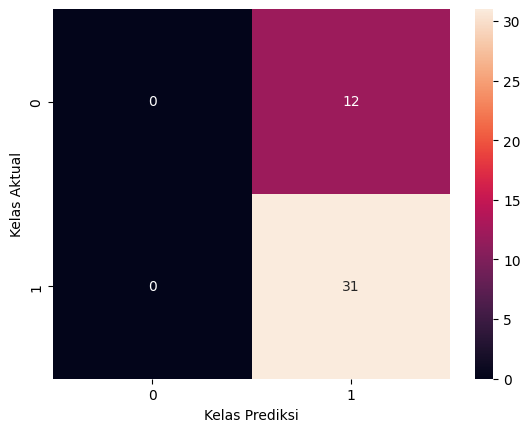

In [69]:
import seaborn as sns 
import matplotlib.pyplot as plt
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Kelas Prediksi')
plt.ylabel('Kelas Aktual')
plt.show()

#### A3. Plot Hasil Prediksi

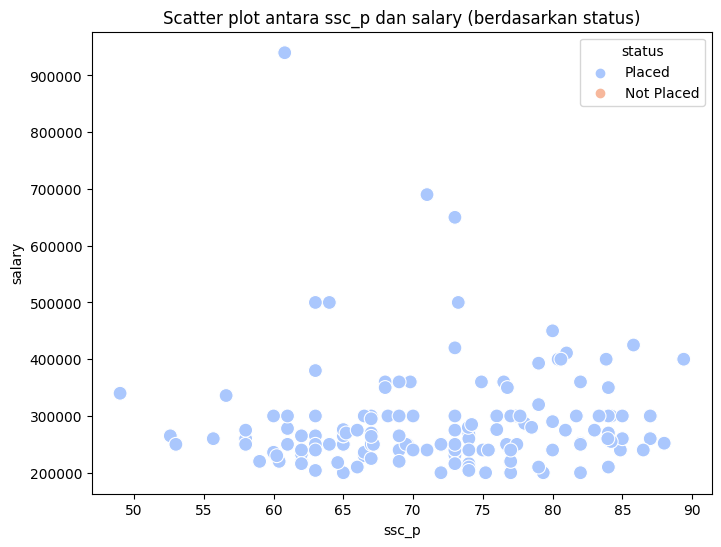

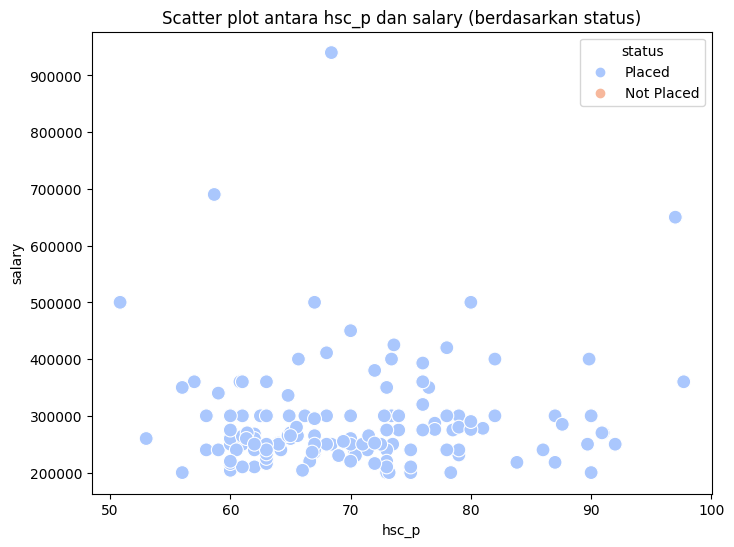

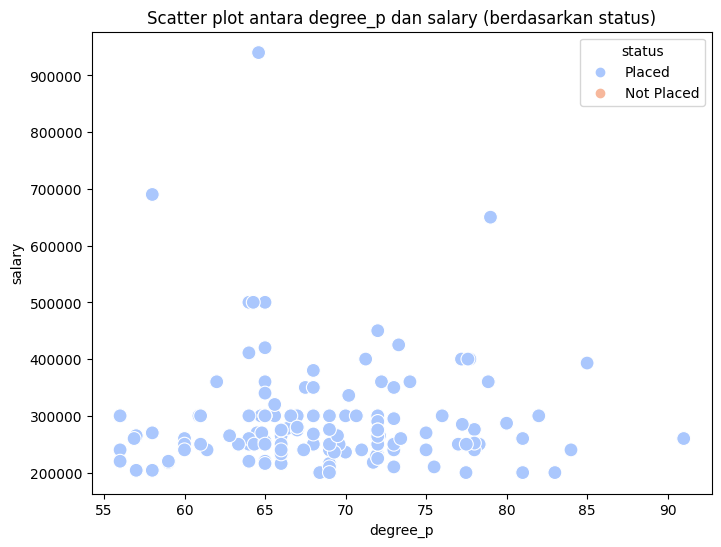

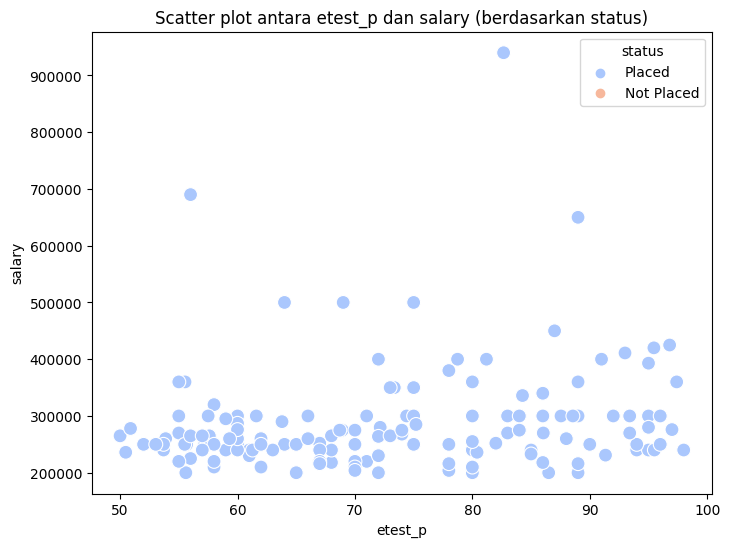

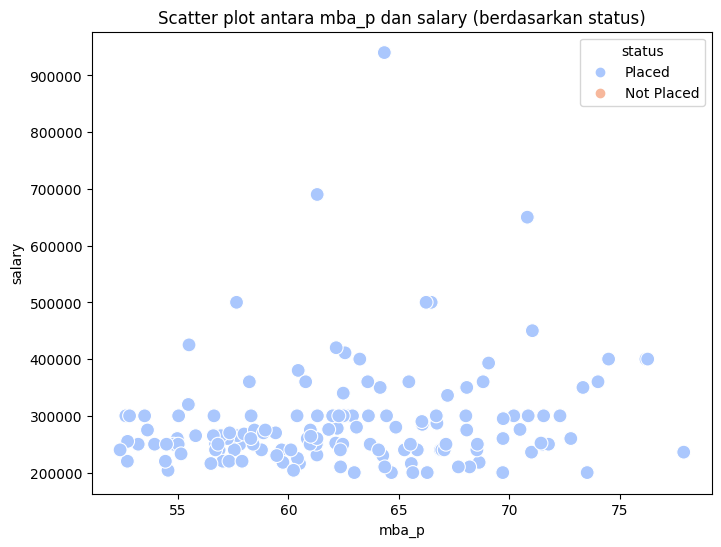

ValueError: array length 43 does not match index length 215

<Figure size 800x600 with 0 Axes>

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data
numerical_columns = ['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p']
target_column = 'salary'  # Kolom target yang ingin diprediksi

# Scatter plot untuk setiap fitur numerik dengan target asli
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=data[column], y=data[target_column], hue=data['status'], palette='coolwarm', edgecolor='w', s=100)
    plt.xlabel(column)
    plt.ylabel(target_column)
    plt.title(f'Scatter plot antara {column} dan {target_column} (berdasarkan status)')
    plt.show()

# Scatter plot untuk hasil prediksi dengan target asli
plt.figure(figsize=(8, 6))
sns.scatterplot(x=predictions, y=y_test, hue=data['status'], palette='coolwarm', edgecolor='w', s=100)
plt.xlabel('Hasil Prediksi')
plt.ylabel('Target Asli')
plt.title('Scatter plot antara hasil prediksi dan target asli (berdasarkan status)')
plt.show()


## B. Unsupervised Learning

### B1. K-Means

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
data = pd.read_csv("Placement_Data_Full_Class.csv")
X = data[['ssc_p','hsc_p']]
K = 2 
kmeans = KMeans(n_clusters=K, n_init=10)
kmeans.fit(X)
cluster_labels = kmeans.labels_ 
data["cluster"] = cluster_labels
centroids = kmeans.cluster_centers_
cluster_mapping = {0: 1, 1: 0}
data["cluster"] = data['cluster'].map(cluster_mapping)

### B2. Evaluasi Hasil Clustering

#### Dengan Label Asli

In [87]:
cross_tab = pd.crosstab(data["cluster"], data["status"])
print("Cross-Tabulation:")
print(cross_tab, "\n")

# Adjusted Rand Index (ARI)
ari = adjusted_rand_score(data["status"], data['cluster'])
print(f"Adjusted Rand Index (ARI): {ari:.2f}")

# Normalized Mutual Information (NMI)
nmi = normalized_mutual_info_score(data['status'], data['cluster'])
print(f"Normalized Mutual Information (NMI): {nmi:.2f}")

# Fungsi HCV-M
homogeneity = homogeneity_score(data["status"], data['cluster'])
completeness = completeness_score(data["status"], data['cluster'])
v_measure = v_measure_score(data["status"], data['cluster'])
print(f"Homogeneity Score: {homogeneity:.2f}")
print(f"Completeness Score: {completeness:.2f}")
print(f"V-Measure Score: {v_measure:.2f}")

Cross-Tabulation:
status   Not Placed  Placed
cluster                    
0                 6      90
1                61      58 

Adjusted Rand Index (ARI): 0.16
Normalized Mutual Information (NMI): 0.20
Homogeneity Score: 0.21
Completeness Score: 0.19
V-Measure Score: 0.20


In [77]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
# Silhouette Score
ss_score = silhouette_score(X, data['cluster'])
print(f"Silhouette Score: {ss_score:.2f}")

# Davies-Bouldin Index
db_index = davies_bouldin_score(X, data['cluster'])
print(f"Davies-Bouldin Index: {db_index:.2f}")

# Calinski-Harabasz Index
ch_index = calinski_harabasz_score(X, data['cluster'])
print(f"Calinski-Harabasz Index: {ch_index:.2f}")

Silhouette Score: 0.39
Davies-Bouldin Index: 0.95
Calinski-Harabasz Index: 185.95


#### Tanpa Label Asli

In [84]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
inertia = kmeans.inertia_
print("Inertia:", inertia)
silhouette_avg = silhouette_score(X, cluster_labels)
print("Silhouette Score:", silhouette_avg)

db_index = davies_bouldin_score(X, cluster_labels)
print("Davies-Bouldin Index:", db_index)

Inertia: 26962.199141351542
Silhouette Score: 0.387165026868327
Davies-Bouldin Index: 0.9492084232623454


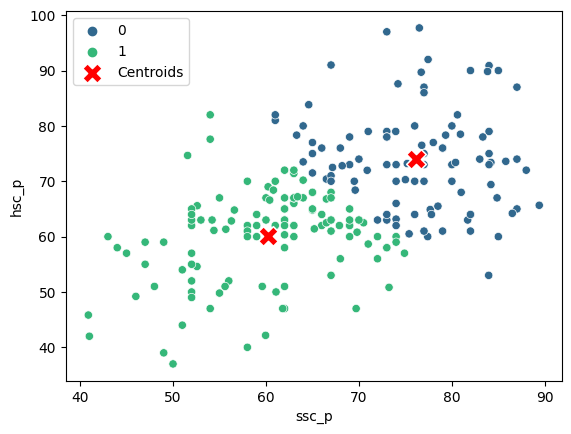

In [72]:
# Menampilkan hasil clustering
sns.scatterplot(data=data, x='ssc_p', y='hsc_p', hue='cluster', palette='viridis')
sns.scatterplot(x=centroids[:, 0], y=centroids[:, 1], color='red', marker='X', s=200, label='Centroids')
plt.xlabel('ssc_p')
plt.ylabel('hsc_p')
plt.legend()
plt.show()